# Spotify ML Models

### Data Packages Setup

In [119]:
# Data
import numpy as np
import pandas as pd 

# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns 


# Warning Suppression 
import warnings
warnings.filterwarnings('ignore')

### Import Dataset (Huggingface)

In [120]:
# Spotify dataset from Huggingface in pd 
# https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

### Explore Dataset

- Basic Statistical Analysis 

In [121]:
# Shape of dataframe
print(f"Dataframe shape: {df.shape}")

Dataframe shape: (114000, 21)


In [122]:
# Information of dataframe for dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [123]:
# Check for null values 
print(f"Null values:\n{df.isnull().sum()}")

Null values:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [124]:
# Check unique counts 
print(f"Unique values:\n{df.nunique()}")

Unique values:
Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64


In [125]:
# Statistical Inference
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [126]:
# Dataframe Head (Against Attribute Dictionary)
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


- Data Preprocessing based off above observations

In [127]:
def df_cleaning(df):
    """
    Generic function to process/clean above dataframe

    Args:
        df (pd.Dataframe)
        
    Return:
        pd.Dataframe(Cleaned dataframe)    
        
    """
    
    # Create new copy of df for processing
    df_cleaned = df.copy()
    
    # Store shape 
    old_rows = df_cleaned.shape[0]
    print (f"Processing:\nCreated copy of existing df with {old_rows} records")
    
    # Drop null values
    df_cleaned = df_cleaned.dropna()
    rows_removed = old_rows - df_cleaned.shape[0]
    print (f"Removed {rows_removed} records with null value")
    
    # Drop columns not needed 
    cols_drop = ['Unnamed: 0', 'track_id', 'explicit', 'time_signature'] # Change as required
    df_cleaned = df_cleaned.drop(columns = cols_drop)
    print (f"Dropped {cols_drop} columns\nNo of columns dropped: {len(cols_drop)}")
    print (f"Cleaned df shape:{df_cleaned.shape}")
    
    return df_cleaned


In [128]:
# Cleaning function implemented 
cleaned_df = df_cleaning(df)

Processing:
Created copy of existing df with 114000 records
Removed 1 records with null value
Dropped ['Unnamed: 0', 'track_id', 'explicit', 'time_signature'] columns
No of columns dropped: 4
Cleaned df shape:(113999, 17)


Target Variable is 'popularity' (ML model to predict for). 

For purposes of model training feature engineering ```'popularity_class'``` will be created, where:

| popularity_class       | Encoded Value | Meaning   |
| ---------------------- | ------------- | --------- |
| 0–49                   | 0             | Unpopular |
| 50–100                 | 1             | Popular   |

The scoring threshold was selected based off deemed reasonableness and to prevent an overly imbalanced dataset for model purposes.

In [129]:
def target_label(df):
    
    """
    Function to label encode target variable for this particular dataset

    Args:
        df (pd.Dataframe)
        
    Return:
        pd.Dataframe(Transformed dataframe)    
        
    """
    
    # Create new copy of df for transfomration 
    class_encode = df.copy()
    
    old_rows = class_encode.shape[0]
    print (f"Processing:\nCreated copy of existing df with {old_rows} records")
    
    # Initialize counter for popular tracks
    pop_count = 0
    total_rows = len(class_encode)
    
    # Create new column 
    class_encode['popularity_class'] = 0
    
  
    for i, row in class_encode.iterrows():
        if row.popularity >= 50: # Threshold set
            class_encode.loc[i, 'popularity_class'] = 1
            pop_count +=1  
    
    print(f"Encoding complete:\n{pop_count} popular tracks ({(pop_count/total_rows)*100:.2f}%)\n{total_rows-pop_count} unpopular tracks ({((total_rows-pop_count)/total_rows)*100:.2f}%)")
    
    # Drop popularity column 
    cols_drop_t = ['popularity']
    class_encode = class_encode.drop(columns = cols_drop_t)       
    print (f"Dropped {cols_drop_t} columns\nNo of columns dropped: {len(cols_drop_t)}")
    print (f"Changed df shape:{class_encode.shape}") 
    
    return class_encode       

In [130]:
# Encoding function implemented 
trans_df = target_label(cleaned_df)

Processing:
Created copy of existing df with 113999 records
Encoding complete:
29367 popular tracks (25.76%)
84632 unpopular tracks (74.24%)
Dropped ['popularity'] columns
No of columns dropped: 1
Changed df shape:(113999, 17)


In [131]:
trans_df.head(5)

,artists,album_name,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,popularity_class
0,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic,1
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic,1
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic,1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic,1
4,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic,1


In [132]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   duration_ms       113999 non-null  int64  
 4   danceability      113999 non-null  float64
 5   energy            113999 non-null  float64
 6   key               113999 non-null  int64  
 7   loudness          113999 non-null  float64
 8   mode              113999 non-null  int64  
 9   speechiness       113999 non-null  float64
 10  acousticness      113999 non-null  float64
 11  instrumentalness  113999 non-null  float64
 12  liveness          113999 non-null  float64
 13  valence           113999 non-null  float64
 14  tempo             113999 non-null  float64
 15  track_genre       113999 non-null  object 
 16  popularity_class  113999 

### Visualise Dataset
Visualising numeric features of dataset

In [133]:
df_numeric_unscaled = trans_df.iloc[:, 3:-2]  # Exclude 'track_genre' and 'popularity_class'
df_numeric_unscaled.head(5)

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949


Boxplot of numeric features (Outlier detection)

Text(0.5, 1.0, 'Numerical Features with outliers (Unscaled)')

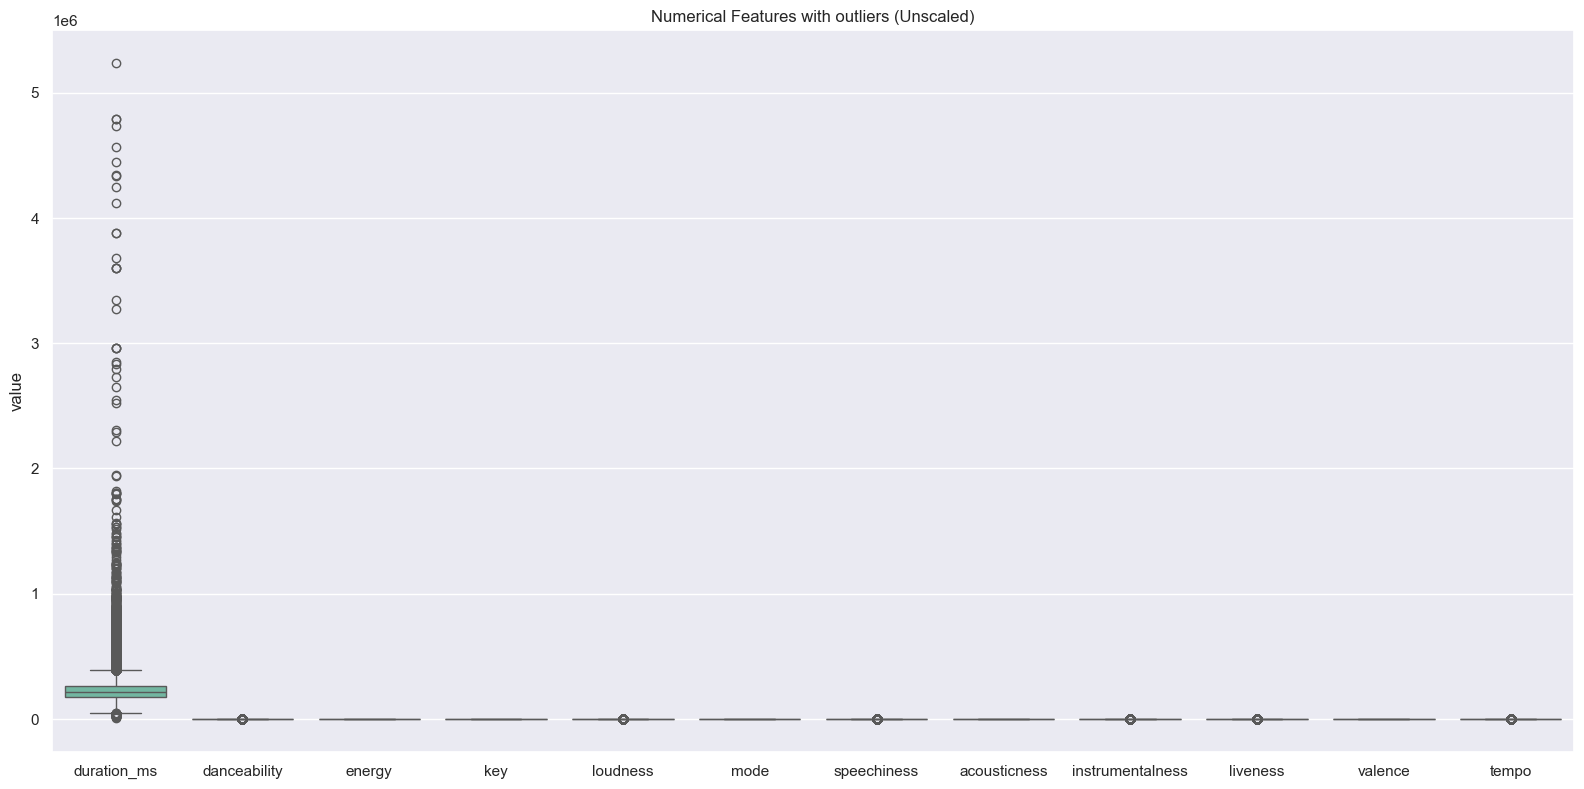

In [134]:
# Set seaborn theme for plotting 
sns.set_theme(style='darkgrid')

#Pandas melt to reshape from wide to long format where y will be value for plotting 
df_melt=pd.melt(df_numeric_unscaled)
df_melt

#Box plot with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(x='variable', y='value', data=df_melt, palette='Set2')
plt.xlabel(None)
plt.tight_layout()
plt.title('Numerical Features with outliers (Unscaled)')

Text(0.5, 1.0, 'Numercial Features without outliers (Unscaled)')

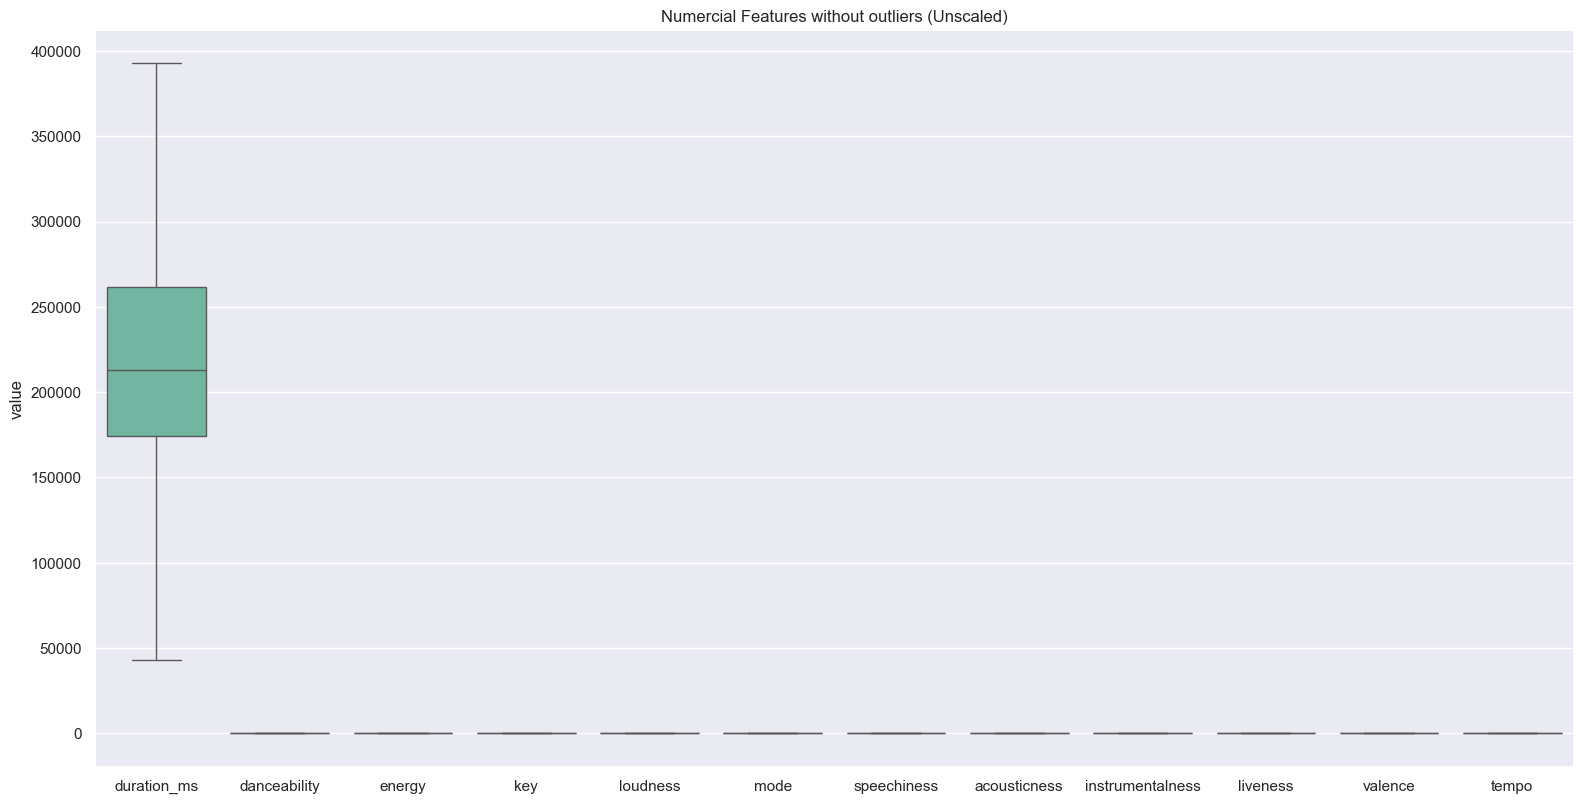

In [135]:
#Box plot without outliers
plt.figure(figsize=(16, 8))
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False, palette='Set2')
plt.xlabel(None)
plt.tight_layout()
plt.title('Numercial Features without outliers (Unscaled)')

In [136]:
# Checking qty of outliers

df_outlier = df_numeric_unscaled
for col in df_outlier.columns:
  q1=df_outlier[col].quantile(0.25)
  q3=df_outlier[col].quantile(0.75)
  inq=q3-q1
  filter=(df_outlier[col] >= q1-1.5*inq) & (df_outlier[col] <= q3+1.5*inq)
  df_outlier[col] = df_outlier[col].loc[filter]

In [137]:
# Number of outliers for each predictor
df_outlier.isna().sum()
print(f"Null values:\n{df_outlier.isna().sum()}")

Null values:
duration_ms          5616
danceability          620
energy                  0
key                     0
loudness             6173
mode                    0
speechiness         13211
acousticness            0
instrumentalness    25246
liveness             8642
valence                 0
tempo                 617
dtype: int64


Based off the number of outliers, 'speechiness', 'instrumentalness' columns are to be dropped 

In [138]:
# Dropping of 2 columns due to excessive outliers
df_outlier_drop = trans_df.drop(axis=1, labels=['speechiness', 'instrumentalness'])
print(f"Columns dropped: {len(['speechiness', 'instrumentalness'])}")
print(f"Numerical columns remaning:\n {df_outlier_drop.columns}")

Columns dropped: 2
Numerical columns remaning:
 Index(['artists', 'album_name', 'track_name', 'duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'acousticness', 'liveness',
       'valence', 'tempo', 'track_genre', 'popularity_class'],
      dtype='object')


In [139]:
df_outlier_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   duration_ms       113999 non-null  int64  
 4   danceability      113999 non-null  float64
 5   energy            113999 non-null  float64
 6   key               113999 non-null  int64  
 7   loudness          113999 non-null  float64
 8   mode              113999 non-null  int64  
 9   acousticness      113999 non-null  float64
 10  liveness          113999 non-null  float64
 11  valence           113999 non-null  float64
 12  tempo             113999 non-null  float64
 13  track_genre       113999 non-null  object 
 14  popularity_class  113999 non-null  int64  
dtypes: float64(7), int64(4), object(4)
memory usage: 17.9+ MB


### Scaling dataset numerical features

- Feature scaling using StandardScaler to standardize numeric feature range for plotting

In [140]:
# StandardScaler 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [141]:
# Scaling numeric features only, exclude target (col 16)
df_X = df_outlier_drop.iloc[:, 3:-2]  # Exclude 'track_genre' and 'popularity_class'

# Fit and transform the features
df_scaled_num = scale.fit_transform(df_X)
df_scaled_num = pd.DataFrame(df_scaled_num, columns=df_X.columns)

df_scaled_num.describe()

,duration_ms,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo
count,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05
mean,-5.784118e-17,-9.374260e-17,2.241346e-16,1.844934e-17,2.164058e-16,-6.183023e-17,-1.196714e-17,2.169044e-16,-2.373483e-16,4.642253e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.045239e+00,-3.266071e+00,-2.549938e+00,-1.491334e+00,-8.206263e+00,-1.326297e+00,-9.470287e-01,-1.121741e+00,-1.828535e+00,-4.074556e+00
25%,-5.029578e-01,-6.384656e-01,-6.734145e-01,-9.295339e-01,-3.487638e-01,-1.326297e+00,-8.962048e-01,-6.069741e-01,-8.256808e-01,-7.648634e-01
50%,-1.409672e-01,7.605855e-02,1.734064e-01,-8.683341e-02,2.495260e-01,7.539789e-01,-4.387898e-01,-4.283813e-01,-3.882571e-02,-4.359668e-03
75%,3.119872e-01,7.387221e-01,8.452970e-01,7.558671e-01,6.473917e-01,7.539789e-01,8.498512e-01,3.122534e-01,8.058864e-01,5.978788e-01
max,4.668658e+01,2.409787e+00,1.425747e+00,1.598568e+00,2.543268e+00,7.539789e-01,2.048272e+00,4.130987e+00,2.009312e+00,4.043754e+00


Text(0.5, 1.0, 'Numerical Features with outliers (Scaled)')

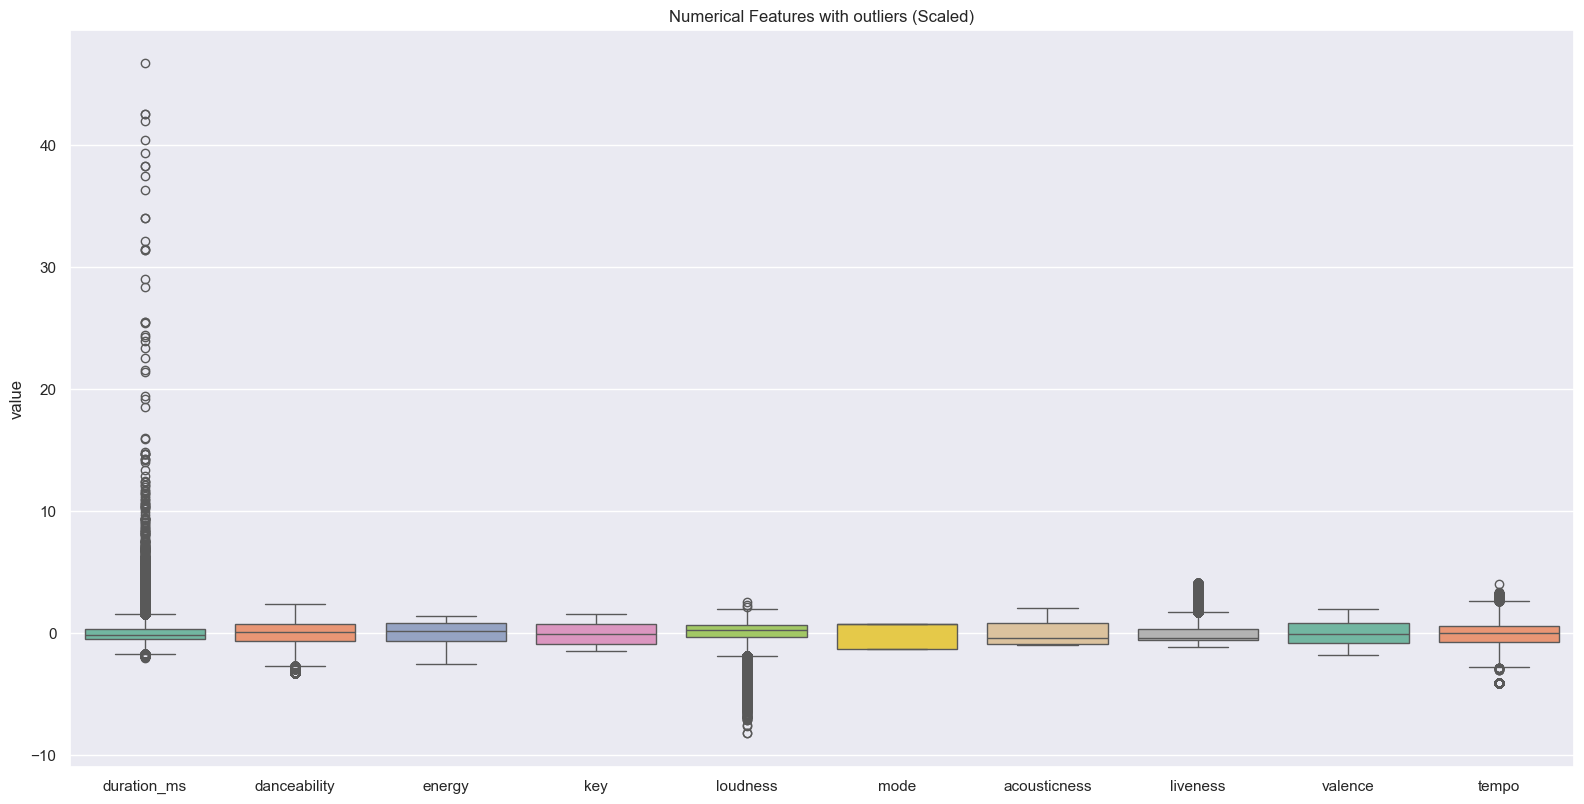

In [142]:
# Set seaborn theme for plotting 
sns.set_theme(style='darkgrid')

#Pandas melt to reshape from wide to long format where y will be value for plotting 
df_melt=pd.melt(df_scaled_num)
df_melt

#box plot with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(x='variable', y='value', data=df_melt, palette='Set2')
plt.xlabel(None)
plt.tight_layout()
plt.title('Numerical Features with outliers (Scaled)')

Text(0.5, 1.0, 'Numercial Features without outliers (Scaled)')

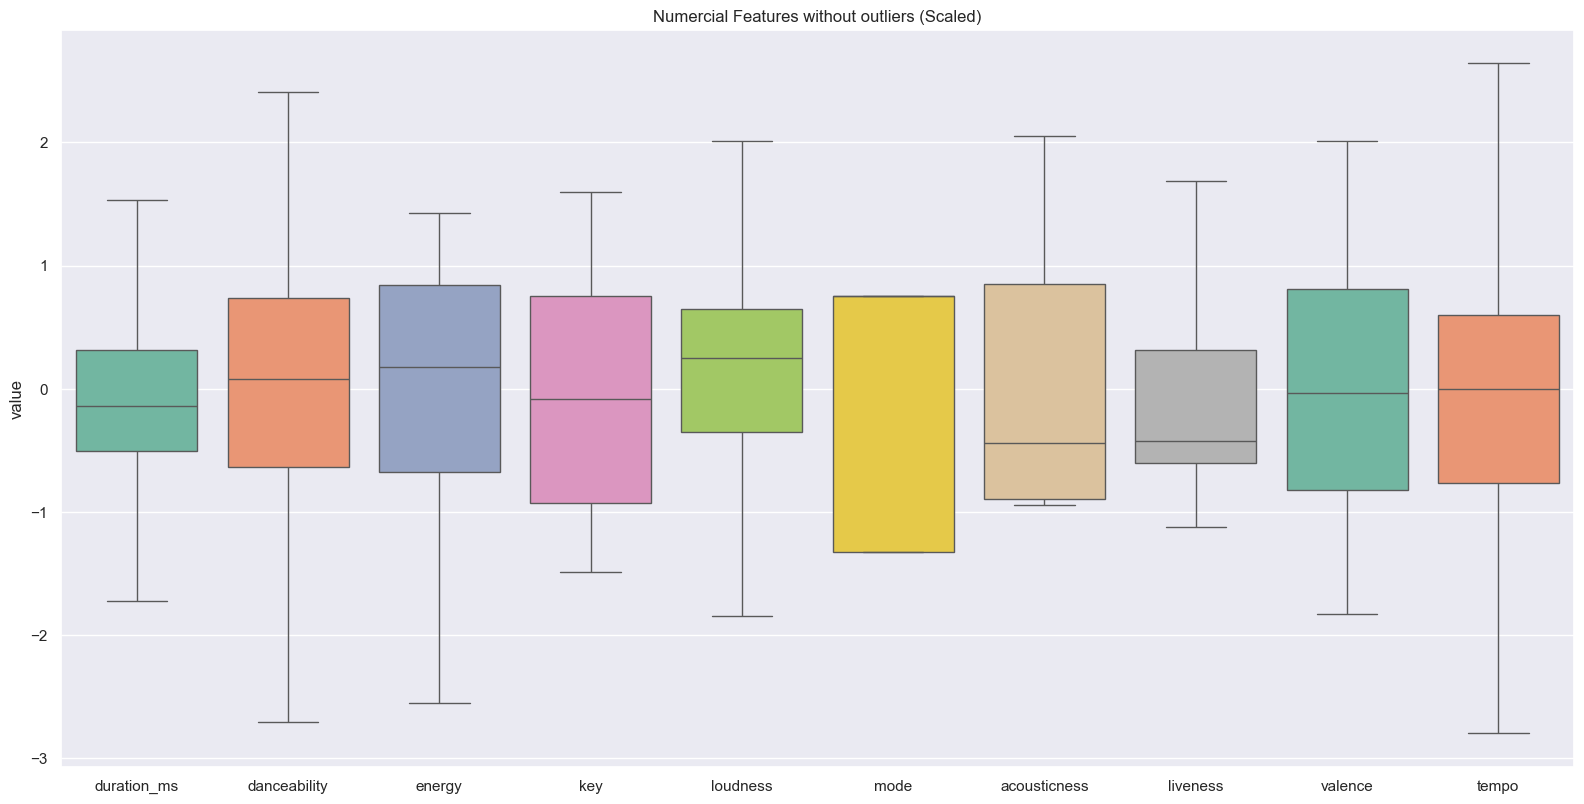

In [143]:
#box plot without outliers
plt.figure(figsize=(16, 8))
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False, palette='Set2')
plt.xlabel(None)
plt.tight_layout()
plt.title('Numercial Features without outliers (Scaled)')

Correlation Matrix of Numerical Features

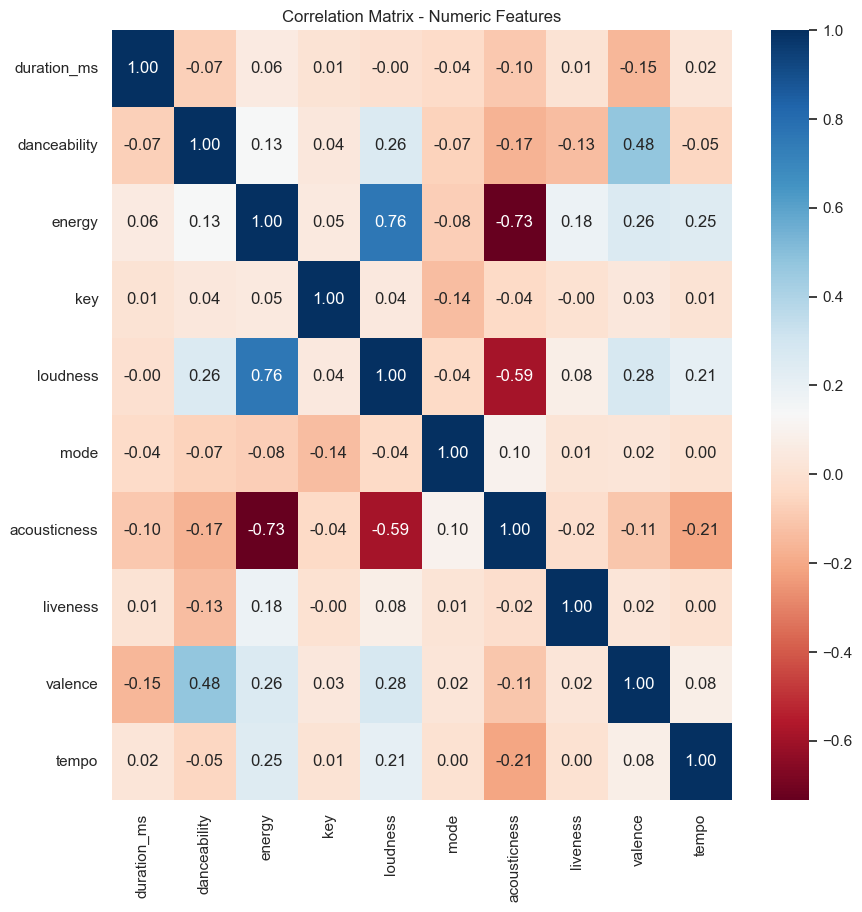

In [144]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_scaled_num.corr(), annot=True, fmt=".2f", cmap= 'RdBu')
plt.title("Correlation Matrix - Numeric Features")
plt.show()

Creating final scaled dataset with all features (Track Names, etc.)

In [145]:
# Create final dataframe combining categorical and scaled numerical features
final_combined_df = pd.DataFrame()

# Add categorical columns from trans_df (after dropping outlier columns)
trans_df_clean = trans_df.drop(columns=['speechiness', 'instrumentalness'])

# Extract categorical columns (artists, album_name, track_name, track_genre)
categorical_cols = ['artists', 'album_name', 'track_name', 'track_genre']
final_combined_df[categorical_cols] = trans_df_clean[categorical_cols]

# Add all scaled numerical features from df_scaled_num
for col in df_scaled_num.columns:
    final_combined_df[col] = df_scaled_num[col]

# Add target variable
final_combined_df['popularity_class'] = trans_df_clean['popularity_class']

# Verify the final structure
print("Final combined dataframe info:")
print(f"Shape: {final_combined_df.shape}")
print("\nColumn info:")
final_combined_df.info()

print("\nFirst few rows:")
final_combined_df.head()

Final combined dataframe info:
Shape: (113999, 15)

Column info:
<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   track_genre       113999 non-null  object 
 4   duration_ms       113998 non-null  float64
 5   danceability      113998 non-null  float64
 6   energy            113998 non-null  float64
 7   key               113998 non-null  float64
 8   loudness          113998 non-null  float64
 9   mode              113998 non-null  float64
 10  acousticness      113998 non-null  float64
 11  liveness          113998 non-null  float64
 12  valence           113998 non-null  float64
 13  tempo             113998 non-null  float64
 14  popularity_class  113999 non-null  int64  
dtypes: float

,artists,album_name,track_name,track_genre,duration_ms,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,popularity_class
0,Gen Hoshino,Comedy,Comedy,acoustic,0.024557,0.629239,-0.717147,-1.210434,0.300825,-1.326297,-0.850193,0.758735,0.929315,-1.141854,1
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic,-0.730889,-0.845908,-1.889974,-1.210434,-1.784739,0.753979,1.831744,-0.591216,-0.798681,-1.489708,1
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic,-0.160353,-0.742187,-1.122667,-1.491334,-0.293289,0.753979,-0.315489,-0.507172,-1.365679,-1.528303,1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic,-0.243236,-1.733301,-2.312987,-1.491334,-2.039246,0.753979,1.774605,-0.428381,-1.276965,1.987857,1
4,Chord Overstreet,Hold On,Hold On,acoustic,-0.271942,0.295026,-0.788709,-0.929534,-0.282751,0.753979,0.463409,-0.686290,-1.184394,-0.073343,1


### Model Training

Create X and Y 

In [146]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [147]:
X = X = df_scaled_num.copy() 
print(f"Shape of X: {X.shape}")

Shape of X: (113999, 10)


In [148]:
y = final_combined_df['popularity_class']
print(f"Shape of y: {y.shape}")

Shape of y: (113999,)


Train-Test Split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

### First Model Train

In [150]:
# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Scoring
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

First model training to determine general model performance against test set

In [151]:
# First Model Training and reporting
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(verbose=1),
    "Gradient Boosting": GradientBoostingClassifier(verbose=1),
    "XGBoost": XGBClassifier()
}

for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy score for {name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))


Training: Logistic Regression
Accuracy score for Logistic Regression: 0.7451
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85     16987
           1       0.54      0.00      0.00      5813

    accuracy                           0.75     22800
   macro avg       0.64      0.50      0.43     22800
weighted avg       0.69      0.75      0.64     22800


Training: K-Nearest Neighbors
Accuracy score for K-Nearest Neighbors: 0.7425
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     16987
           1       0.49      0.38      0.43      5813

    accuracy                           0.74     22800
   macro avg       0.65      0.62      0.63     22800
weighted avg       0.72      0.74      0.73     22800


Training: Decision Tree
Accuracy score for Decision Tree: 0.7793
Classification Report:
              precision    recall  f1-score   support



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   15.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Accuracy score for Random Forest: 0.8496
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     16987
           1       0.88      0.48      0.62      5813

    accuracy                           0.85     22800
   macro avg       0.86      0.73      0.76     22800
weighted avg       0.85      0.85      0.83     22800


Training: Gradient Boosting
      Iter       Train Loss   Remaining Time 
         1           1.1390           22.54s
         2           1.1360           21.77s
         3           1.1332           21.12s
         4           1.1306           22.13s
         5           1.1279           22.10s
         6           1.1254           21.70s
         7           1.1234           21.62s
         8           1.1209           21.32s
         9           1.1189           20.80s
        10           1.1170           20.45s
        20           1.1023           17.56s
        30           1.0930           1

| Model                | Accuracy Score |
|----------------------|----------------|
| Random Forest        | 0.8493         |
| Decision Tree        | 0.7779         |
| XGBoost              | 0.7590         |
| Gradient Boosting    | 0.7600         |
| Logistic Regression  | 0.7451         |
| K-Nearest Neighbors  | 0.7425         |


All models appear to general decent accuracy with Random Forest exibhiting high accuracy and precision score. 

As we are looking to predict for Class 1 (Popular Songs) to focus will be on model selection with a high Class 1 precision score (Positives from of all positive predictions including TP/FP). It is to note that several models perform poorly on Recell (Actual TP rates).

### 3-Fold Cross Validation

In [152]:
# 3-Fold Cross Validation to round down towards final model selection
mean_df = []
for name, model in models.items():
  mean_arr = {}
  cv_results = cross_val_score(model, X_train, y_train, cv=3)
  print(name, cv_results)
  mean = np.mean(cv_results)
  mean_arr['name']=name
  mean_arr['result']=mean
  mean_df.append(mean_arr)
  

Logistic Regression [0.74144737 0.74174342 0.74150465]
K-Nearest Neighbors [0.72575658 0.72996711 0.72703049]
Decision Tree [0.74391447 0.749375   0.74311655]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   10.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    9.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   10.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


Random Forest [0.82398026 0.821875   0.81946775]
      Iter       Train Loss   Remaining Time 
         1           1.1388           15.20s
         2           1.1355           15.61s
         3           1.1323           15.70s
         4           1.1297           15.56s
         5           1.1272           15.48s
         6           1.1244           15.42s
         7           1.1219           15.33s
         8           1.1201           15.28s
         9           1.1185           15.31s
        10           1.1163           15.17s
        20           1.1009           14.22s
        30           1.0911           13.21s
        40           1.0842           11.31s
        50           1.0791            9.37s
        60           1.0745            7.56s
        70           1.0710            5.66s
        80           1.0673            3.73s
        90           1.0644            1.86s
       100           1.0619            0.00s
      Iter       Train Loss   Remaining Time 
    

In [153]:
# Average scoring
pd.DataFrame(mean_df)

,name,result
0,Logistic Regression,0.741565
1,K-Nearest Neighbors,0.727585
2,Decision Tree,0.745469
3,Random Forest,0.821774
4,Gradient Boosting,0.742749
5,XGBoost,0.754800


Based off the above results the following models are rounded down:
| Model                | Accuracy Score (Mean over 3 Folds) |
|----------------------|------------------------------------|
| Random Forest        | 0.8219                             |
| XGBoost              | 0.7548                             |
| Decision Tree        | 0.7456                             |

### 5 Fold Cross Validation for Final Model Selection

Random Forest

In [154]:
cross_val_mod = RandomForestClassifier()
cv_results = cross_val_score(cross_val_mod, X, y, cv=5)
cv_results

array([0.82644737, 0.82390351, 0.83671053, 0.81219298, 0.80753542])

In [155]:
cv_mean = np.mean(cv_results)
print(f"Model Accuracy (5-Fold Validation): {cv_mean}")

Model Accuracy (5-Fold Validation): 0.8213579608370019


XGBoost

In [156]:
cross_val_mod = XGBClassifier()
cv_results = cross_val_score(cross_val_mod, X, y, cv=5)
cv_results

array([0.75197368, 0.74254386, 0.74464912, 0.74635965, 0.73893592])

In [157]:
cv_mean = np.mean(cv_results)
print(f"Model Accuracy (5-Fold Validation): {cv_mean}")

Model Accuracy (5-Fold Validation): 0.7448924468063004


Decision Tree

In [158]:
cross_val_mod = DecisionTreeClassifier()
cv_results = cross_val_score(cross_val_mod, X, y, cv=5)
cv_results

array([0.74359649, 0.7304386 , 0.73824561, 0.74232456, 0.71489978])

In [160]:
cv_mean = np.mean(cv_results)
print(f"Model Accuracy (5-Fold Validation): {cv_mean}")

Model Accuracy (5-Fold Validation): 0.7339010078927746


No significant drop in accuracy observed after 5-fold validation. 

### Random Forest Model Implementation (1st Ranked)

In [161]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [162]:
# Model Prediction (Against train and test set)
# Model training accuracy
y_pred_train_rf=rf_model.predict(X_train)
# Model testing accuracy
y_pred_test_rf=rf_model.predict(X_test)

In [164]:
# Assess initial model performance
print("Random Model Performance (Initial):")
print("-" * 50)
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train_rf):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test_rf):.4f}")
print(classification_report(y_test, y_pred_test_rf))

Random Model Performance (Initial):
--------------------------------------------------
Training Accuracy: 0.9924
Testing Accuracy: 0.8509
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     16987
           1       0.88      0.48      0.62      5813

    accuracy                           0.85     22800
   macro avg       0.87      0.73      0.76     22800
weighted avg       0.86      0.85      0.83     22800



In [165]:
# Perform GridSearchCV to find the best hyperparameters

# CV = Cross validation Model (RF)
rf_tree_cv = RandomForestClassifier(random_state=42)

In [166]:
# Use GridSearch to derive optimal hyperparameters of RandomForestClassifier model

import time

np.random.seed(42)
start = time.time()


# Create hyperparameter grid (balance time and performance)
param_dist = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [3, 5, 7],              # Maximum depth of trees
    'min_samples_split': [2, 5],         # Minimum samples required to split
    'min_samples_leaf': [1, 2],          # Minimum samples required at leaf
    'max_features': ['sqrt', 'log2'],    # Feature selection method
    'criterion': ['gini', 'entropy']     # Split criterion
}

# Cross validation using GridsearchCV 
cv_rf_tree =GridSearchCV(rf_tree_cv, cv = 5,
                     param_grid=param_dist,
                     n_jobs = 3,scoring='accuracy',
                     verbose=1)

# Print best identified params using GridsearchCV
cv_rf_tree.fit(X_train,y_train)
print('Best Parameters using grid search: \n',
     cv_rf_tree.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Time taken in grid search:  4064.81


**GridSearchCV output**

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters using grid search: 

 {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Time taken in grid search:  4064.81s

In [167]:
# Get the best parameters from the Grid Search
rf_tree_cv.set_params(criterion = 'gini', max_depth = 7 , max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=42)

In [168]:
# Fit the training data to the model (with tuned parameters)
rf_tree_cv.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=42)

In [170]:
# Get predictions for both training and test sets (Tuned Hyperparameters)
# Prediction against train
y_pred_train_rf2 = rf_tree_cv.predict(X_train)
# Prediction against test
y_pred_test_rf2 = rf_tree_cv.predict(X_test)

In [171]:
# Calculate and print performance metrics
print("Random Forest Model Performance with GridSearchCV Parameters:")
print("-" * 50)
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train_rf2):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test_rf2):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_rf2))

Random Forest Model Performance with GridSearchCV Parameters:
--------------------------------------------------
Training Accuracy: 0.7429
Testing Accuracy: 0.7458

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85     16987
           1       0.70      0.01      0.01      5813

    accuracy                           0.75     22800
   macro avg       0.73      0.50      0.43     22800
weighted avg       0.74      0.75      0.64     22800



Evaluation of the revised model using GridsearchCV parameters indicates model overfitting towards Class 0, likely exacerbated by class imbalance. 

### XGBoost Model Implementation (2nd Ranked)

In [172]:
# Model Building
start = time.time()
xgb = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
 objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
#xgb= XGBClassifier(nthread=11,objective= 'binary:logistic')
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
end = time.time()
print('Time taken in algo run: {0: .2f}'.format(end - start))

Time taken in algo run:  8.03


In [173]:
# Compute predictions on training and testing sets

# Prediction against train
y_train_pred_xgb = xgb.predict(X_train)

# Prediction against test
y_test_pred_xgb = xgb.predict(X_test)

In [174]:
# Calculate metrics
xgb_metrics = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_xgb),
    'test_accuracy': accuracy_score(y_test, y_test_pred_xgb),
    'classification_report': classification_report(y_test, y_test_pred_xgb)
}

# Display results in a formatted way
print("XGBoost Model Evaluation Metrics (Initial):")
print("-" * 40)
print(f"Training Accuracy:  {xgb_metrics['train_accuracy']:.4f}")
print(f"Testing Accuracy:   {xgb_metrics['test_accuracy']:.4f}")
print("\nDetailed Classification Report:")
print("-" * 40)
print(xgb_metrics['classification_report'])

XGBoost Model Evaluation Metrics (Initial):
----------------------------------------
Training Accuracy:  0.8291
Testing Accuracy:   0.7715

Detailed Classification Report:
----------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     16987
           1       0.66      0.21      0.32      5813

    accuracy                           0.77     22800
   macro avg       0.72      0.59      0.59     22800
weighted avg       0.75      0.77      0.72     22800



In [175]:
# Use GridSearchCV to find the optimal hyperparameters

np.random.seed(42)
start = time.time()

param_grid_xgb = {
    'learning_rate': [0.01, 0.1],        # Learning rate
    'max_depth': [3, 5, 7],              # Maximum tree depth
    'n_estimators': [100, 200],          # Number of boosting rounds
    'min_child_weight': [1, 3],          # Minimum sum of instance weight in child
    'subsample': [0.8, 0.9],             # Subsample ratio of training instances
    'colsample_bytree': [0.8, 0.9],      # Subsample ratio of columns when building trees
    'gamma': [0, 0.1]                    # Minimum loss reduction for partition
}

# Assuming the dataset and XGBoost model are properly defined, use GridSearchCV
xgboost_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Print start of search
print("Starting Grid Search...")

# Fit the model on training datasets
xgboost_grid_search.fit(X_train, y_train)

# Get the best parameters from the Grid Search
# Print results
print("\nBest parameters found:", xgboost_grid_search.best_params_)
print("Best cross-validation accuracy:", xgboost_grid_search.best_score_)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Starting Grid Search...
Fitting 5 folds for each of 192 candidates, totalling 960 fits

Best parameters found: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Best cross-validation accuracy: 0.7620697677186826
Time taken in grid search:  1293.11


**GridSearchCV output**

Starting Grid Search...
Fitting 5 folds for each of 192 candidates, totalling 960 fits

Best parameters found: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}


Best cross-validation accuracy: 0.7620697677186826
Time taken in grid search:  1293.11s

In [176]:
# Initialize and train the model with the GridsearchCV parameters (Per above)

CV_xgboost_model = XGBClassifier(
    colsample_bytree=0.9,
    gamma=0,
    learning_rate=0.1, 
    max_depth=7,
    min_child_weight=1,
    n_estimators=200,
    subsample=0.9,
)

# Train the model on the training data
CV_xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [177]:
# Compute predictions on training and testing sets

# Prediction against train
y_train_pred_xgb2 = CV_xgboost_model.predict(X_train)
# Prediction against test
y_test_pred_xgb2 = CV_xgboost_model.predict(X_test)

In [178]:
# Confirm predictions
xgb_predictions = {
    "Training Predictions": y_train_pred_xgb2[:5],
    "Testing Predictions": y_test_pred_xgb2[:5]
}

xgb_predictions

{'Training Predictions': array([0, 0, 0, 0, 0]),
 'Testing Predictions': array([0, 0, 0, 0, 0])}

In [179]:
# Evaluate the second XGBoost model using accuracy, F1 score, and classification report
xgb_accuracy_train = accuracy_score(y_train, y_train_pred_xgb2)
xgb_accuracy_test = accuracy_score(y_test, y_test_pred_xgb2)
xgb_class_report = classification_report(y_test, y_test_pred_xgb2)

# Display evaluation metrics 
print("XGBoost Model Performance with GridsearchCV parameters:")
print("-" * 40)
print(f"Training Accuracy:  {xgb_accuracy_train:.4f}")
print(f"Testing Accuracy:   {xgb_accuracy_test:.4f}")
print("\nClassification Report:")
print("-" * 40)
print(xgb_class_report)


XGBoost Model Performance with GridsearchCV parameters:
----------------------------------------
Training Accuracy:  0.7944
Testing Accuracy:   0.7644

Classification Report:
----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     16987
           1       0.72      0.13      0.21      5813

    accuracy                           0.76     22800
   macro avg       0.74      0.55      0.54     22800
weighted avg       0.75      0.76      0.70     22800



Minor increase in Class 0 recall after hyperparameter tuning with general model performance drop observed in XGBoost

### Model Comparision for selection

| Model                                  | Test Acc | Precision (1) | Recall (1) | F1-score (1) | Notes                                             |
|----------------------------------------|----------|----------------|------------|--------------|---------------------------------------------------|
| **Random Forest (Initial)**                | 0.8509   | 0.88           | **0.48**       | 0.62         | High accuracy and decent balance on Class 1       |
| Random Forest (GridSearchCV)           | 0.7458   | 0.70           | 0.01       | 0.01         | Very poor recall on Class 1 after tuning          |
| XGBoost (Initial)                      | 0.7715   | 0.66           | 0.21       | 0.32         | Moderate performance, low recall on Class 1       |
| XGBoost (GridSearchCV)                 | 0.7644   | 0.72           | 0.13       | 0.21         | Precision improved slightly, recall still low     |


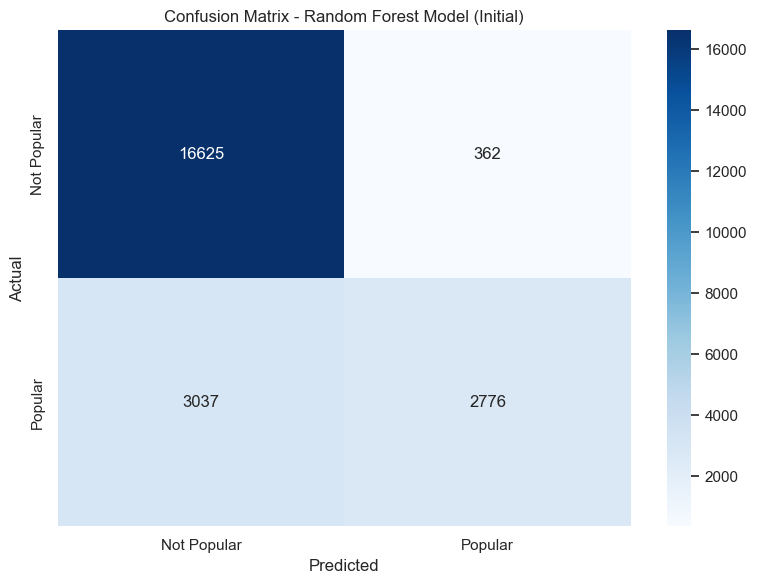

In [180]:
# Confusion Matrix for Initial Random Forest Model
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test_rf)
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Model (Initial)")
plt.tight_layout()
plt.show()

<Axes: xlabel='importance', ylabel='Features'>

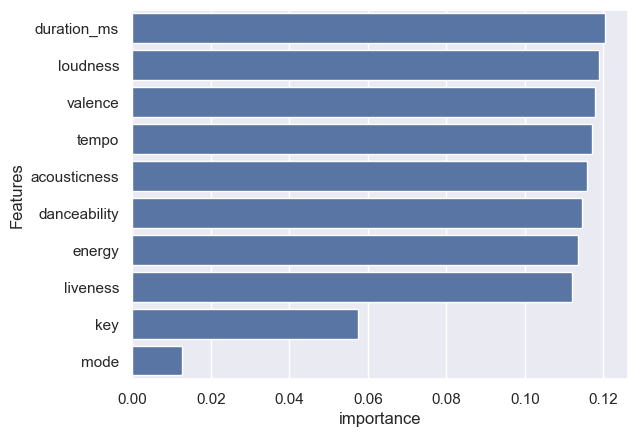

In [181]:
# Feature Importance

feat_imp={'Columns':X_train.columns.values,'Coefficients':rf_model.feature_importances_}
feat_imp=pd.DataFrame()
feat_imp['Features']=X_train.columns.values
feat_imp['importance']=rf_model.feature_importances_
feat_imp=feat_imp.sort_values(by='importance', ascending=False)
sns.barplot(y="Features", x="importance", data=feat_imp)